In [1]:
pip install numpy pandas matplotlib tensorflow keras opencv-python scikit-learn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 6.7 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 6.1 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.1 MB 6.5 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.1 MB 9.1 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 9.4 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 9.5 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 9.8 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 9.9 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import các thư viện cần thiết
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics


In [3]:
dataset_path = "chest_xray"  

train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'val')
test_dir = os.path.join(dataset_path, 'test')

train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
train_normal_dir = os.path.join(train_dir, 'NORMAL')

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (150, 150))  
            images.append(img)
            labels.append(label)
    return images, labels

# Tải ảnh cho lớp PNEUMONIA và NORMAL
train_pneumonia_images, train_pneumonia_labels = load_images_from_folder(train_pneumonia_dir, 1)  # 1: PNEUMONIA
train_normal_images, train_normal_labels = load_images_from_folder(train_normal_dir, 0)  # 0: NORMAL

train_images = train_pneumonia_images + train_normal_images
train_labels = train_pneumonia_labels + train_normal_labels

train_images = np.array(train_images)
train_labels = np.array(train_labels)

X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_test = X_test / 255.0

print(f'Train images shape: {X_train.shape}')
print(f'Test images shape: {X_test.shape}')


Train images shape: (4172, 150, 150, 3)
Test images shape: (1044, 150, 150, 3)


In [4]:
# Xây dựng mô hình CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()


c:\Users\ngoth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,               
    rotation_range=40,           
    width_shift_range=0.2,        
    height_shift_range=0.2,     
    shear_range=0.2,             
    zoom_range=0.2,               
    horizontal_flip=True,       
    fill_mode='nearest'           
)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_generator = test_datagen.flow(X_test, y_test, batch_size=32)


In [7]:
history = model.fit(
    train_generator,               
    steps_per_epoch=len(X_train) // 32,   
    epochs=10,                     
    validation_data=validation_generator,  
    validation_steps=len(X_test) // 32    
)


c:\Users\ngoth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 63s 470ms/step - accuracy: 0.7293 - loss: 0.6032 - val_accuracy: 0.7236 - val_loss: 0.5947
Epoch 2/10
  1/130 ━━━━━━━━━━━━━━━━━━━━ 49s 386ms/step - accuracy: 0.7812 - loss: 0.5245

c:\Users\ngoth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7812 - loss: 0.5245 - val_accuracy: 0.7227 - val_loss: 0.5958
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 57s 440ms/step - accuracy: 0.7568 - loss: 0.5585 - val_accuracy: 0.7236 - val_loss: 0.5907
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7188 - loss: 0.5851 - val_accuracy: 0.7188 - val_loss: 0.5953
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 56s 429ms/step - accuracy: 0.7495 - loss: 0.5680 - val_accuracy: 0.7217 - val_loss: 0.5925
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7500 - loss: 0.5646 - val_accuracy: 0.7217 - val_loss: 0.5925
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 56s 429ms/step - accuracy: 0.7447 - loss: 0.5702 - val_accuracy: 0.7207 - val_loss: 0.6075
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8438 - loss: 0.4373 - val_accuracy: 0.7178 - val_loss: 0.6130
Epoch 9/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 55s 420ms/step - accuracy: 0.7499 - loss: 0.5659 - val_accurac

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - accuracy: 0.7204 - loss: 0.5936
Loss: 0.5927866101264954
Accuracy: 0.7212643623352051


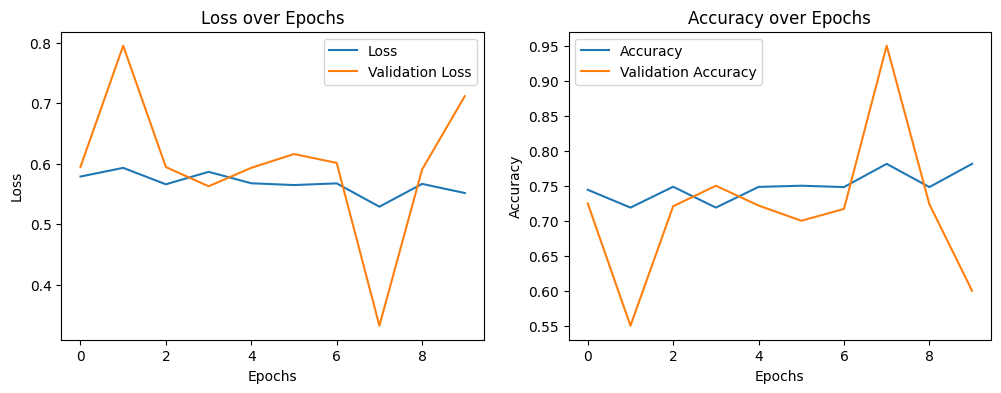

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
model_save_path = "chest_xray_pneumonia_model.h5"
model.save(model_save_path)
print(f"Model đã được lưu tại: {model_save_path}")


Model đã được lưu tại: chest_xray_pneumonia_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


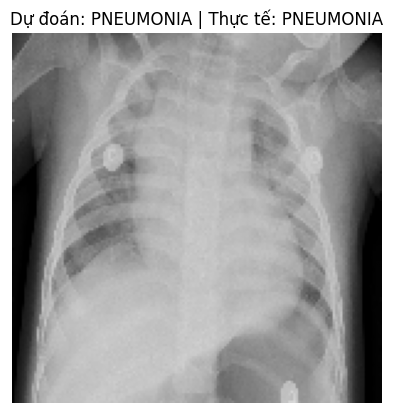

In [61]:
import random

idx = random.randint(0, len(X_test) - 1)
sample_image = X_test[idx]
sample_label = y_test[idx]

sample_image_expanded = np.expand_dims(sample_image, axis=0)

prediction = model.predict(sample_image_expanded)
predicted_class = "PNEUMONIA" if prediction[0] > 0.5 else "NORMAL"
actual_class = "PNEUMONIA" if sample_label == 1 else "NORMAL"

plt.imshow(sample_image)
plt.title(f"Dự đoán: {predicted_class} | Thực tế: {actual_class}")
plt.axis("off")
plt.show()


Check và train lại ver2

In [55]:
unique, counts = np.unique(y_train, return_counts=True)
print("Phân bố lớp trong dữ liệu huấn luyện:", dict(zip(unique, counts)))


Phân bố lớp trong dữ liệu huấn luyện: {0: 1050, 1: 3122}


In [56]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)


Class weights: {0: 1.9866666666666666, 1: 0.6681614349775785}


In [62]:
def wrap_generator_with_class_weights(generator, class_weights):
    for batch_x, batch_y in generator:
        sample_weight = np.array([class_weights[label] for label in batch_y], dtype=np.float32)
        yield batch_x, batch_y, sample_weight


In [63]:
train_gen_wrapped = wrap_generator_with_class_weights(train_generator, class_weights)
val_gen_wrapped = wrap_generator_with_class_weights(validation_generator, class_weights)


In [64]:
history = model.fit(
    train_gen_wrapped,
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=val_gen_wrapped,
    validation_steps=len(X_test) // 32
)


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 117s 890ms/step - accuracy: 0.7500 - loss: 0.7049 - val_accuracy: 0.7207 - val_loss: 0.7186
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 106s 816ms/step - accuracy: 0.6866 - loss: 0.6901 - val_accuracy: 0.7243 - val_loss: 0.7151
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 107s 823ms/step - accuracy: 0.5023 - loss: 0.6995 - val_accuracy: 0.7095 - val_loss: 0.7186
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 103s 794ms/step - accuracy: 0.4160 - loss: 0.6918 - val_accuracy: 0.3034 - val_loss: 0.7121
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 106s 818ms/step - accuracy: 0.5609 - loss: 0.6872 - val_accuracy: 0.6917 - val_loss: 0.7225
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 101s 780ms/step - accuracy: 0.5912 - loss: 0.6872 - val_accuracy: 0.6186 - val_loss: 0.6794
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 106s 817ms/step - accuracy: 0.5946 - loss: 0.6627 - val_accuracy: 0.7322 - val_loss: 0.6249
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 103s 793ms/step - accuracy: 0.6180 -

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.7890 - loss: 0.4497
Loss: 0.4385409951210022
Accuracy: 0.8141762614250183


In [ ]:
model_save_path = "chest_xray_pneumonia_model_ver2.h5"
model.save(model_save_path)
print(f"Model đã được lưu tại: {model_save_path}")


Model đã được lưu tại: chest_xray_pneumonia_model_ver2.h5


Kích thước ảnh: (150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Dự đoán: PNEUMONIA (Confidence: 1.00)
Thực tế: PNEUMONIA


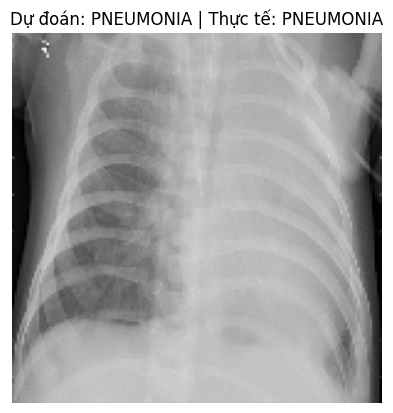

In [258]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

model = tf.keras.models.load_model("chest_xray_pneumonia_model_ver2.h5")
index = random.randint(0, len(X_test) - 1)
sample_image = X_test[index]
sample_label = y_test[index]
print("Kích thước ảnh:", sample_image.shape)
sample_image_batch = np.expand_dims(sample_image, axis=0)
prediction = model.predict(sample_image_batch)
predicted_label = "PNEUMONIA" if prediction[0][0] > 0.5 else "NORMAL"
actual_label = "PNEUMONIA" if sample_label == 1 else "NORMAL"
print(f"Dự đoán: {predicted_label} (Confidence: {prediction[0][0]:.2f})")
print(f"Thực tế: {actual_label}")
plt.imshow(sample_image)
plt.title(f"Dự đoán: {predicted_label} | Thực tế: {actual_label}")
plt.axis("off")
plt.show()


Train version 3

In [8]:
print("Train images shape:", X_train.shape)  
print("Train labels distribution:", dict(zip(*np.unique(y_train, return_counts=True))))


Train images shape: (4172, 150, 150, 3)
Train labels distribution: {np.int64(0): np.int64(1050), np.int64(1): np.int64(3122)}


In [9]:
import numpy as np

indices_normal = np.where(y_train == 0)[0]
indices_pneumonia = np.where(y_train == 1)[0]

n_samples = len(indices_normal)  # 1050

np.random.seed(42)
indices_pneumonia_sample = np.random.choice(indices_pneumonia, size=n_samples, replace=False)

balanced_indices = np.concatenate([indices_normal, indices_pneumonia_sample])
np.random.shuffle(balanced_indices)

X_train_balanced = X_train[balanced_indices]
y_train_balanced = y_train[balanced_indices]

unique, counts = np.unique(y_train_balanced, return_counts=True)
print("Balanced training set distribution:", dict(zip(unique, counts)))


Balanced training set distribution: {np.int64(0): np.int64(1050), np.int64(1): np.int64(1050)}


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator()

batch_size = 32
train_generator = train_datagen.flow(X_train_balanced, y_train_balanced, batch_size=batch_size)

validation_generator = validation_datagen.flow(X_test, y_test, batch_size=batch_size)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train_balanced) // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size
)


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 30s 431ms/step - accuracy: 0.5564 - loss: 0.6837 - val_accuracy: 0.7627 - val_loss: 0.5751
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7812 - loss: 0.5408 - val_accuracy: 0.8281 - val_loss: 0.5237
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 28s 427ms/step - accuracy: 0.7322 - loss: 0.5643 - val_accuracy: 0.8574 - val_loss: 0.3659
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7188 - loss: 0.5525 - val_accuracy: 0.8682 - val_loss: 0.3464
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 28s 430ms/step - accuracy: 0.7675 - loss: 0.4974 - val_accuracy: 0.8740 - val_loss: 0.3238
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8438 - loss: 0.3836 - val_accuracy: 0.9053 - val_loss: 0.2855
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 29s 439ms/step - accuracy: 0.8208 - loss: 0.4246 - val_accuracy: 0.7363 - val_loss: 0.5612
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8750 - loss: 0.3367 - val_accuracy: 0.

In [13]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.8147 - loss: 0.4125
Loss: 0.4154084324836731
Accuracy: 0.8103448152542114


In [14]:
model_save_path = "chest_xray_pneumonia_model_ver3.h5"
model.save(model_save_path)
print(f"Model đã được lưu tại: {model_save_path}")


Model đã được lưu tại: chest_xray_pneumonia_model_ver3.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


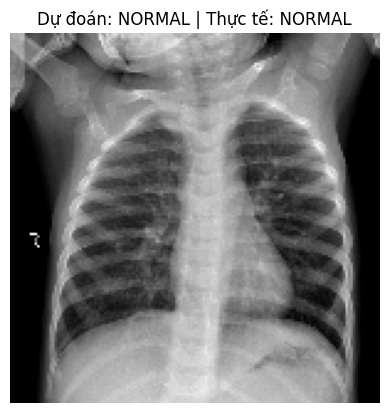

In [15]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0, len(X_test) - 1)
sample_image = X_test[idx]
sample_label = y_test[idx]

sample_image_expanded = np.expand_dims(sample_image, axis=0)
prediction = model.predict(sample_image_expanded)
predicted_class = "PNEUMONIA" if prediction[0] > 0.5 else "NORMAL"
actual_class = "PNEUMONIA" if sample_label == 1 else "NORMAL"

plt.imshow(sample_image)
plt.title(f"Dự đoán: {predicted_class} | Thực tế: {actual_class}")
plt.axis("off")
plt.show()